### Import Liabraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Algerian_test.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,0.75,64.4000,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,0.75,49.0725,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,0.75,49.0725,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,1,0


In [2]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [3]:
X = df.drop(['Classes','year','Region'],axis=1)
y = df['Classes'] # Region

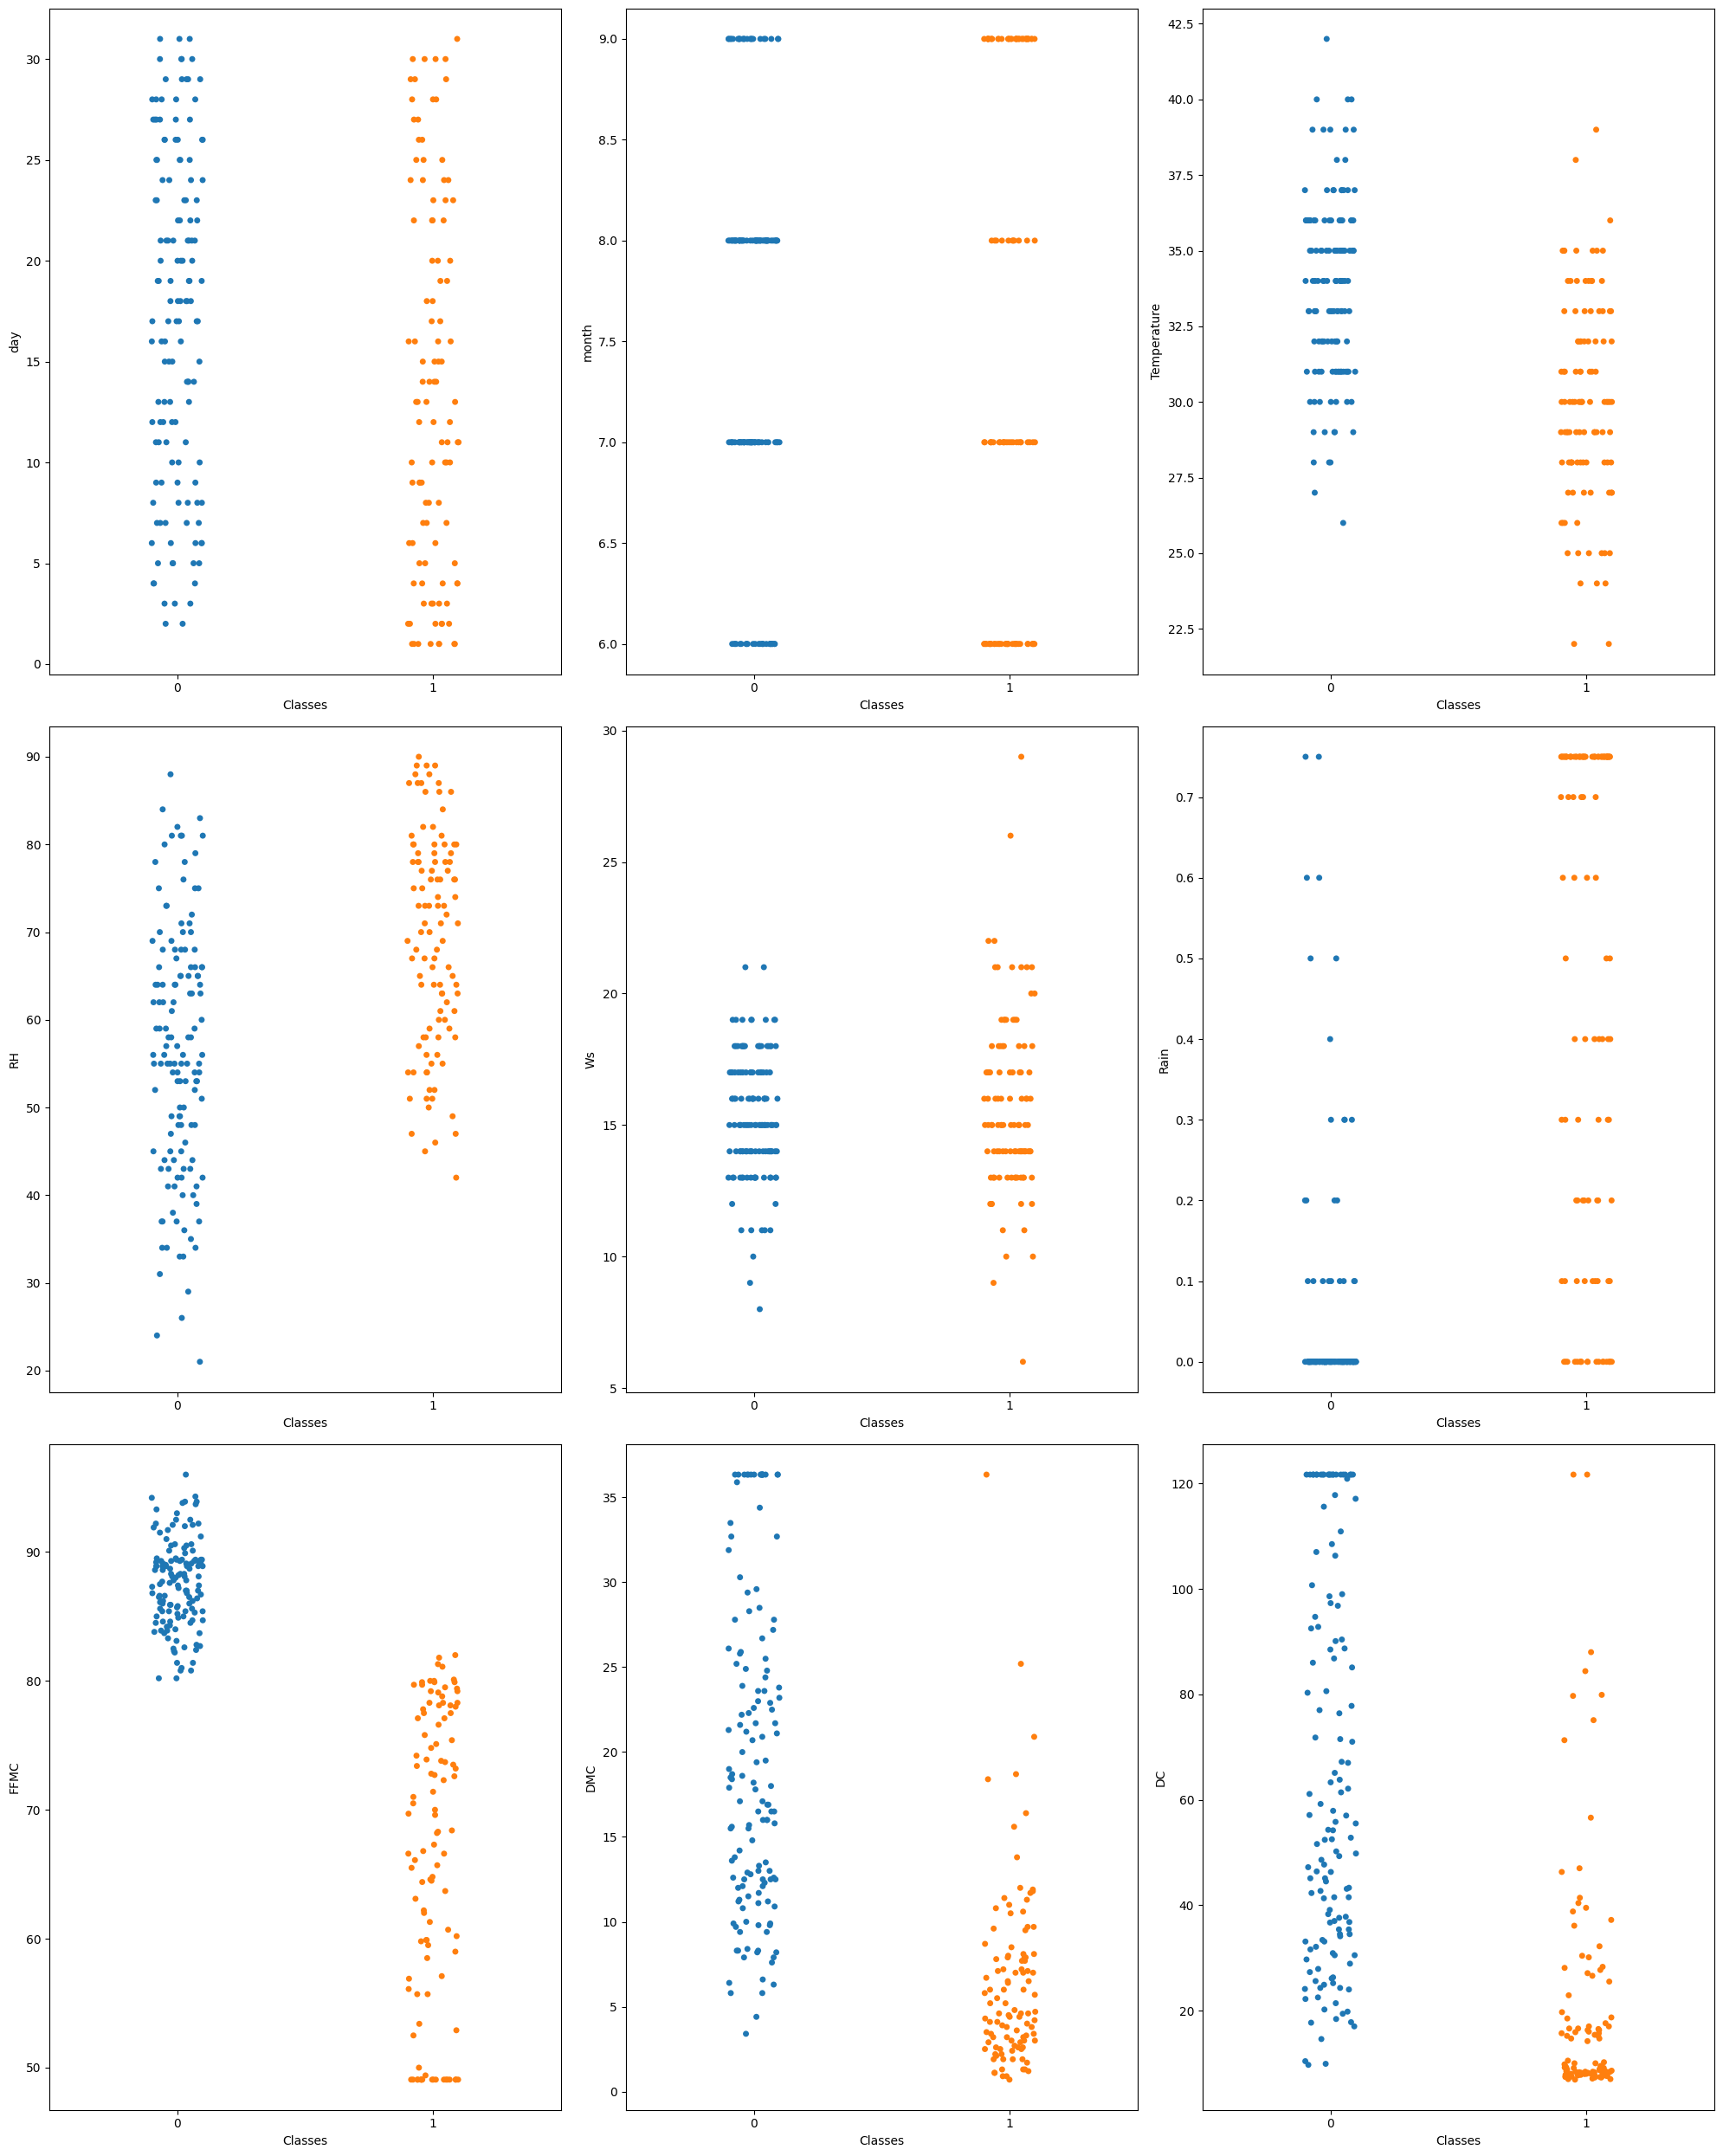

In [4]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [5]:
#Standardize or feature scaling the datasets 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [6]:
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled

array([[-1.67527776, -1.35052592, -0.87473544, ..., -0.85814016,
        -1.03444326, -0.91399469],
       [-1.56173115, -1.35052592, -0.87473544, ..., -0.93407809,
        -0.99303294, -0.92828638],
       [-1.44818455, -1.35052592, -1.70200461, ..., -1.1112666 ,
        -1.0924177 , -0.97116146],
       ...,
       [ 1.39048054,  1.35052592, -1.42624822, ..., -1.08595396,
        -1.03444326, -0.95686977],
       [ 1.50402714,  1.35052592, -2.25351739, ..., -0.75688958,
        -0.89364819, -0.88541131],
       [ 1.61757374,  1.35052592, -2.25351739, ..., -0.8834528 ,
        -0.91849437, -0.91399469]])

### Variance Inflation Factor

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

vif

,vif,Features
0,1.560998,day
1,1.080859,month
2,2.705902,Temperature
3,3.904802,RH
4,1.324215,Ws
5,4.526173,Rain
6,9.122979,FFMC
7,64.414169,DMC
8,22.898355,DC
9,35.638456,ISI


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25, random_state= 355)

In [10]:
from sklearn.linear_model  import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [11]:
import pickle
# Writing different model files to file
with open( 'log_reg.pkl', 'wb') as f:
    pickle.dump(log_reg,f)

with open('log_reg.pkl','rb') as f:
    pickle.load(f)


In [12]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [13]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9508196721311475

### Confusion Matrix

In [14]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[31,  3],
       [ 0, 27]], dtype=int64)

In [15]:
true_positive = conf_mat[0][0]
true_positive

31

In [16]:
false_positive = conf_mat[0][1]
false_positive

3

In [17]:
false_negative = conf_mat[1][0]
false_negative

0

In [18]:
true_negative = conf_mat[1][1]
true_negative

27

### Accuracy

In [19]:

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9508196721311475

### Precision

In [20]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9117647058823529

### Recall

In [21]:
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

### F1 Score

In [22]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9538461538461539

### Area Under Curve

In [23]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9558823529411764

### ROC

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

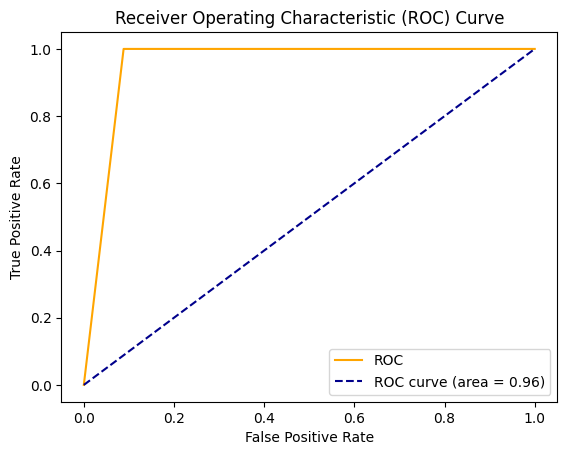

In [25]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()